<a href="https://colab.research.google.com/github/brianshin12/19-lab/blob/master/SMILE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SMILES
* SMILES는 Simplified Molecular Input Line Entry System의 약어로  
분자와 화학반응을 문자로 표기하는 간단하면서 포괄적인 화학언어이다.  
* SMILES는 연구자들의 화학정보를 간단한 문자로 변환해주는 메커니즘 및  
화학 전문 시스템이나 AI를 위한 언어로 사용된다.  
  
* SMILES의 간단한 예시  

SMILES | Name | SMILES | Name
---- | ---- | ---- | ----
CC |ethane(에테인)| [OH3+] | hydronium ion(수산화 이온)
O=C=O |carbon dioxide(이산화탄소)| [2H]O[2H] | deuterium oxide(중수:$^{2}H_{2}Water, D_{2}O$)
C#N |hydrogen cyanide(사이안화 수소,HCN)| [235U] | uranium-235
CCN(CC)CC |triethylamine(트리에틸아민,$C_{6}H_{15}N$)| F/C=C/F | E-difluoroethene($C_{2}H_{4}F_{2}$)
CC(=O)O |acetic acid(아세트산)| F/C=C\F | Z-difluoroethene($C_{2}H_{4}F_{2}$)
C1CCCCC1 |cyclohexane(사이클로 헥세인,$C_{6}H_{12}$)| N'['C@@H']'(C)C(=O)O | L-alanine ($CH_{3}CH(NH_{3})COOH$)
c1ccccc1 |benzene(벤젠)| N'['C@H']'(C)C(=O)O | D-alanine (D-알라닌)  
  
* SMILES는 한 분자를 여러가지 방법으로 표현할 수 있다.  
  여러가지 표현법들 중 유일한 표현,unique SMILES을 형성하기위한 알고리즘이 존재한다.  

파이썬 오픈소스 RDkit으로 이러한 SMILES를 표현할 수 있다. 

## SMILES Sepcification Rules (SMILES 규칙)
* SMILE는 띄어쓰기를 사용하지 않고 원자들을 일렬로 나열하여 표현한다.
* 수소원자는 생략하거나, 포함해도 된다.
* 대표적으로 5가지의 규칙이 있다. ( 원자(atom), 결합(bond), 가지(branch), 고리(ring), 단절(disconnection) )  

### Atoms(원자)
1. 수소를 포함하지 않는 단일원자는 대괄호 [ ]를 사용한다.
2. 유기물질들는 [  ] 없이 쓰이기도 한다.
3. 원자들을 기본 값으로 최소원자가 전자를 갖는다.

### Bonds(결합)  
1. 단일결합은 -, 이중결합은 =, 삼중결합은 #, 방향족 결합은 :으로 표기하며 단일결합과 방향족 결합은 거의 생략한다.

### Branches(가지; 치환기, 작용기)
1. 가지들은 중첩되거나 쌓일 수 있으며, 소괄호( )로 묶어 결합 원소의 오른쪽에 써준다.

### Cyclic Structures (고리형 구조)
1. 고리형 구조는 고리에서 하나의 결합을 끊어 선형적으로 표시하고, 결합을 끊은 원자 바로 뒤에 숫자를 이용해 고리형 구조를 표현한다.

### Disconnected Structures (단절된 구조)
1. 혼합물은 '.'을 사용하여 각각의 구조들을 분리시킨다.
2. 이온 혹은`리간드(ligands)의 연결은 순서에 상관없이 사용가능하다.  
한 전하가 다른 전하로의 연결을 의미하는 것도 아니고, 알짜 전하를 반드시 0으로 가질 필요도 없다.


### 예시

In [0]:
#원자
H2O = Chem.MolFromSmiles('O')

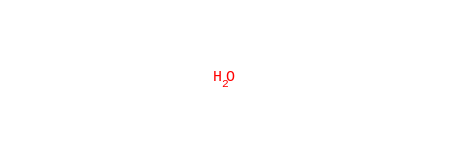

In [35]:
H2O

In [0]:
O = Chem.MolFromSmiles('[O]')

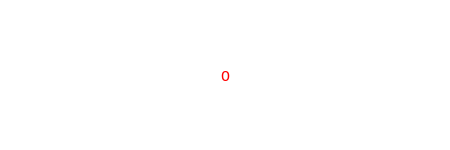

In [37]:
O

In [0]:
#결합
CO2 = Chem.MolFromSmiles('O=C=O')

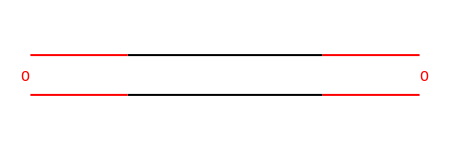

In [41]:
CO2

In [0]:
#가지
HeptanoicAcid = Chem.MolFromSmiles('CCCC(C(=O)O)CCC')

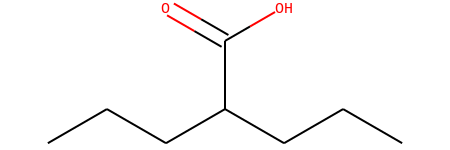

In [45]:
HeptanoicAcid

In [0]:
#고리
Decaline = Chem.MolFromSmiles('C12CCCCC1CCCC2')

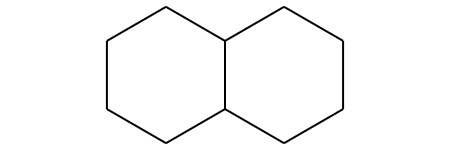

In [47]:
Decaline

In [0]:
#단절
N1 = Chem.MolFromSmiles('[Na+].[O-]CCC')

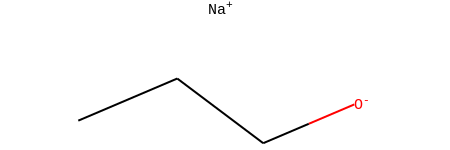

In [67]:
N1

# RDkit    
* 화학정보학에서 가장 잘 알려진 오픈소스 프로그램이다.  
    앞에 예시에서 보았듯이 SMILES규칙을 이용하여 분자를 코드로 표현하여 입력할 수 있다.
* 기능  
여러가지 포맷의 파일 읽음, similarity, scketch, 전하 계산, 안정화  
* 11가지 패키지  
Cehm, DataManip, DataStructs, Dbase, DistanceGeometry, forceField, Geometry, ML, Numerics, SimDivFiters, Vlib  
* 270가지 이상 모듈, 서브 패키지가 존재한다.  
<br>
<br>
<br>
* RDkit의 간단한 코드들을 소개하겠다.  


### RDkit colab으로 불러오기

In [0]:
def DownloadRDkit():
  !wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
  !chmod +x Miniconda3-latest-Linux-x86_64.sh
  !time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
  !time conda install -q -y -c conda-forge rdkit

In [0]:
DownloadRDkit()

In [0]:
%matplotlib inline
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')

### 여러가지 파일 변환시키기

In [0]:
#m이라는 mol object에 스마일에서 가져와서 넣음
from rdkit import Chem
from rdkit.Chem import AllChem
ala='CC(C(=O)O)N'
m=Chem.MolFromSmiles(ala)

In [5]:
#m을 출력하면 저장되어 있는 주소가 나옴
m

### 분자의 특성 보기

In [6]:
#m이라는 mol object를 몰 블록의 형식으로 출력
print (Chem.MolToMolBlock(m))


     RDKit          2D

  6  5  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981   -1.5000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.8971    0.7500    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    2.2500    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  2  0
  3  5  1  0
  2  6  1  0
M  END



6개의 원자 5개의 결합, 2차원 평면상의 좌표를 확인할 수 있다.

### 분자식 확인하기

In [7]:
print(ala)

CC(C(=O)O)N


In [8]:
print (Chem.MolToSmiles(m))

CC(N)C(=O)O


둘은 같은 분자지만 MolToSmiles메서드를 거치면서 unique SMILES을 형성한 것을 확인 할 수 있다.


In [9]:
#Smarts로 표현
print (Chem.MolToSmarts(m))

[#6]-[#6](-[#6](=[#8])-[#8])-[#7]


### 분자를 그림으로 나타내기

In [0]:
#밑 두 코드를 입력하면 분자를 그림으로 나타냄
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

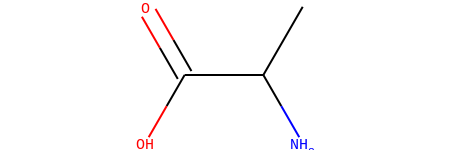

In [11]:
m

In [0]:
#m분자의 수소까지 나타냄
mh=AllChem.AddHs(m)

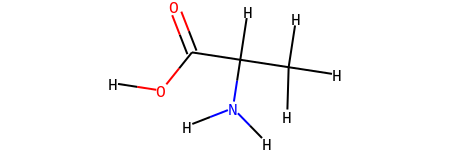

In [13]:
mh

In [14]:
print(Chem.MolToMolBlock(mh))


     RDKit          2D

 13 12  0  0  0  0  0  0  0  0999 V2000
    2.5981    1.5000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2990    0.7500    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.5000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.0490   -0.5490    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.8971    2.2500    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.8481    2.7990    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.5008    0.3021    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.5490    2.0490    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2990   -2.2500    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990   -1.8481    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.5379   -0.7319    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0

수소에 대한 정보 또한 나타낼 수 있다.

### 좌표를 2D $\rightarrow$ 3D로 나타내기

In [15]:
AllChem.EmbedMolecule(mh)

0

In [16]:
print(Chem.MolToMolBlock(mh))


     RDKit          3D

 13 12  0  0  0  0  0  0  0  0999 V2000
   -1.1360   -0.5956   -0.7037 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0566   -0.2631    0.3291 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0543    0.5060   -0.2786 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.3057    1.6577    0.1536 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.8520    0.0341   -1.3116 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6728    0.5054    1.3627 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7606   -0.4837   -1.7266 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9943    0.1156   -0.6051 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5393   -1.5992   -0.4831 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.3586   -1.1936    0.7782 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.7503   -0.3498   -1.0703 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5727    0.1444    2.3140 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5887    1.5217    1.2413 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0

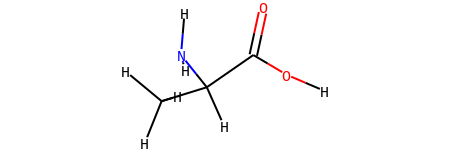

In [17]:
mh

### 안정한 구조 나타내기

In [0]:
ll = AllChem.UFFGetMoleculeForceField(mh)

In [19]:
#에너지 계산
print (ll.CalcEnergy())

29.879420233707375


In [20]:
#안정한 구조
AllChem.UFFOptimizeMolecule(mh)

0

In [21]:
print(ll.CalcEnergy())

12.77722598582374


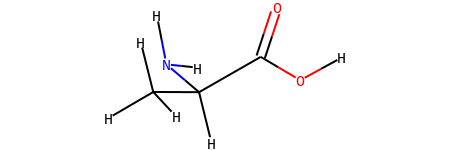

In [22]:
mh

### 분자량 계산하기

In [0]:
from rdkit.Chem import Descriptors

In [24]:
#분자량 계산
print(Descriptors.MolWt(mh))

89.09399999999998


### 고리 수 계산하기

In [25]:
#고리 수 계산
print(Descriptors.RingCount(mh))

0


In [0]:
a=Chem.MolFromSmiles('C1CCCCC1')

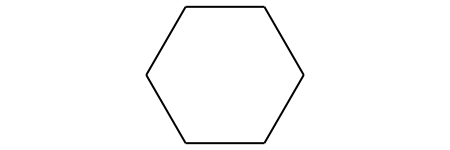

In [27]:
a

In [28]:
Descriptors.RingCount(a)

1